In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
cancer_scaled = scaler.fit_transform(data_df)
cancer_df = pd.DataFrame(cancer_scaled, columns = cancer.feature_names)


In [20]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

vo_clf = VotingClassifier(estimators = [("LR",lr_clf),("KNN", knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer_df, cancer.target, test_size = 0.2, random_state = 156)

In [22]:
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("voting 분류기 정확도: {0:0.4f}".format(accuracy))

voting 분류기 정확도: 0.9737


In [23]:
#개별모델의 학습 평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도: {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.9737
KNeighborsClassifier 정확도: 0.9561


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [24]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby("column_name").cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer') #outer는 합집합, inner는 교집합
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis =1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

def get_human_dataset():
    
    feature_name_df = pd.read_csv('C://Users/user/workplace/Toyprojects/DataSets/HumanActivity/features.txt',sep = '\s+', header = None,
                                 names = ['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv('C://Users/user/workplace/Toyprojects/DataSets/HumanActivity/train/X_train.txt',sep = '\s+', header = None,
                                 names = feature_name)
    X_test = pd.read_csv('C://Users/user/workplace/Toyprojects/DataSets/HumanActivity/test/X_test.txt',sep = '\s+', header = None,
                                 names = feature_name)
    y_train = pd.read_csv('C://Users/user/workplace/Toyprojects/DataSets/HumanActivity/train/y_train.txt',sep = '\s+', header = None,
                                 names = ['action'])
    y_test = pd.read_csv('C://Users/user/workplace/Toyprojects/DataSets/HumanActivity/test/y_test.txt',sep = '\s+', header = None,
                                 names = ['action'])
    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [36]:
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도 {0:.4f}".format(accuracy))
max_depthes = [estimator.tree_.max_depth for estimator in rf_clf.estimators_]#randomforest n_estimators(결정트리의 수)파라미터에서 설정해준 수 많큼 반환
get_depthes = [estimator.get_depth() for estimator in rf_clf.estimators_]

랜덤 포레스트 정확도 0.9253


In [41]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적의 파라미터:\n', grid_cv.best_params_)
print('최고의 정확도 {0:.4f}'.format(grid_cv.best_score_))

최적의 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고의 정확도 0.9180


In [42]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 8, min_samples_split = 8, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print("예측 정확도 :{0:0.4f}".format(accuracy_score(y_test, pred)))

예측 정확도 :0.9165


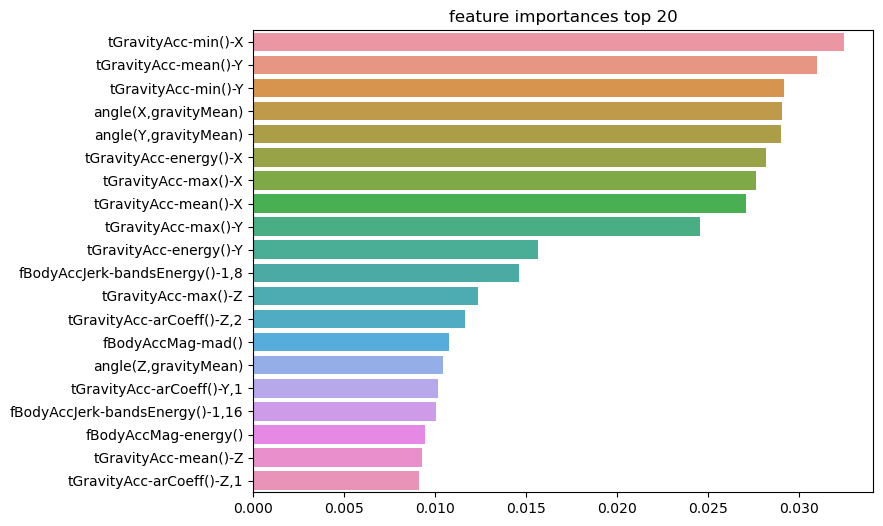

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending= False)[:20]

plt.figure(figsize = (8,6))
plt.title('feature importances top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:0.4f}'.format(gb_accuracy))
print('GBM 수행시간: {0:.1f}'.format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행시간: 626.2


In [ ]:
params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도 {0:0.4f}'.format(grid_cv.best_score_))